In [387]:
import os
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import IFrame, YouTubeVideo

In [2]:
PDF_H, PDF_W = 400, 900

**Custom CSS**

In [3]:
#!cat /Users/mliuzzolino/.jupyter/custom/custom.css

---

# Papers

## Lyapunov Functions

In [4]:
IFrame("https://vanscoy.github.io/docs/papers/taylor2018lyapunov.pdf#view=FitH", width=PDF_W, height=PDF_H)

### Formulation
#### Minimization Problem, $\mathcal{P}$
Consider a minimization problem:

\begin{equation} \tag{$\mathcal{P}$}
   \text{minimize}_{x \in \mathbb{R}^d} \quad f(x),       
\end{equation}
where $f : \mathbb{R}^d \rightarrow \mathbb{R}$.

#### Iterative Methods, $\mathcal{M}$
To solve $\mathcal{P}$, consider methods that iteratively update their estimate of the optimizer using only gradient evaluations. One method for proving convergence of such methods is by finding a *Lyapunov function*.

For example, to solve the optimization problem ($\mathcal{P}$), consider a *first-order iterative fixed-step method* of the form:

\begin{align*} \tag{$\mathcal{M}$}
y_k &= \sum_{j=0}^N \gamma_j x_{k-j} \\
x_{k+1} &= \sum_{j=0}^N \beta_j x_{k-j} - \alpha \nabla f(y_k)
\end{align*}

for $k \ge 0$ where $\alpha, \beta_j, \gamma_j$ are the (Fixed) step-sizes and $x_j \in \mathbb{R}^d$ for $j = -N, \ldots, 0$ are the initial conditions. We call the constant $N \ge 0$ the *degree* of the method.

### Lyapunov Functions
*Lyapunov functions* are one of the fundamental tools in control theory that can be used to *verify stability of a dynamical system*. 

A Lyapunov function can be interpreted as defining an "energy" that decreases *geometrically* with each iteration of the method, with an energy of zero corresponding to reaching the optimal solution of $\mathcal{P}$. The existence of such an energy function provides a straightforward certificate of linear convergence for the iterative method.

Consider applying method ($\mathcal{M}$) to solve problem ($\mathcal{P}$). Our goal is to find the smallest possible $0 \le \rho < 1$ such that $\{x_k \}$ converges linearly to the optimizer $x_*$ with rate $\rho$. A *Lyapunov function* $\mathcal{V}$ is a continuous function $\mathcal{V}: \mathbb{R}^n \rightarrow \mathbb{R}$ that satisfies the following properties:

1. (nonnegative) $\mathcal{V}(\xi) \ge 0$ for all $\xi$,
2. (zero at fixed-point) $\mathcal{V}(\xi) = 0$ iff $\xi = \xi_*$,
3. (radially unbounded) $\mathcal{V}(\xi) \rightarrow \infty$ as $||\xi|| \rightarrow \infty$,
4. (decreasing) $\mathcal{V}(\xi_{k+1}) \le \rho^2 \mathcal{V}(\xi_{k})$ for $k \le N$,

where $\xi_k := (\mathbf{x}_k, \mathbf{g}_k, \mathbf{f}_k)$ for the *state* of the system at iteration $k$. 

If we can find such a $\mathcal{V}$, then it can be used to show that the state converges linearly to the fixed-point from any initial condition, where the rate of convergence depends on both $\rho$ and the structure of $\mathcal{V}$.

---

---

---

## Attractor Networks

### Attractor Networks (Mozer, 2009)
- Mozer, Michael C. (2009) 
- http://www.cs.colorado.edu/~mozer/Research/Selected%20Publications/reprints/Mozer2008.pdf

In [5]:
IFrame("http://www.cs.colorado.edu/~mozer/Research/Selected%20Publications/reprints/Mozer2008.pdf#view=FitH", width=PDF_W, height=PDF_H)

#### Key Points
- An attractor network is a recurrent ANN whose dynamics cause the network state to converge to a fixed point.
 - I.e., given an input, the dynamics of the network will cause the state to evolve over time to a stable value, away from which the state will not wander.
 - The states to which the net might evolve are called _attractors_
- Attractor dynamics are achieved by many neural network architectures
 - Hopfield networks 
   - http://140.116.215.51/course/2012/hopfield.pdf
   - http://www.rctn.org/bruno/public/papers/hopfield84.pdf
 - Harmony networks
 - Boltzmann Machines
   - https://www.cs.toronto.edu/~hinton/absps/cogscibm.pdf
 - Adaptive resonance networks
 - Recurrent back prop networks
   - A learning rule for asynchronous perceptrons with feedback in a combinatorial environment. Almeida, L.B. (1987)
   - Generalization of backpropagation to recurrent and higher order neural networks. Pineda, F.J. (1987)
   - https://papers.nips.cc/paper/67-generalization-of-back-propagation-to-recurrent-and-higher-order-neural-networks.pdf

 
- To ensure attractor dynamics, the architecutre **requires** symmetry of connectivity
 - Symmetry: the conncetion weight from processing unit _A_ to unit _B_ must be the same as the weight from _B_ to _A_.
 - Given this restriction, the dynamics of the network can be characterized as performing local optimization--minimizing *energy*, or equivalently, maximizing *harmony*.
 
- The **input** to an attractor net can either specify the initial state of the net, or it can provide *biases*--fixed input--to each unit.
 - **Biases** reshape the landscape such that the best-matching attractor has maximum harmony, and is likely to be found for a wide range of initial network states.
 
- Knowledge of attractor states is distributed over the connectivity pattern of the entire network - as a result, spurious (undesired) and ill-conditioned (e.g., very narrow) attractor basins may exist.
 - Solution: Localist Attractor Networks (see Zemel & Mozer, 2001)
 - LANs consist of a set of *state units* and a set of *attractor units* (one per unit). Each attractor unit draws the state toward its attractor, with the attractors closer to the state having a greater influence. 

---

### Localist Attractor Networks (Zemel, Mozer, 2001) 
- Zemel, Richard S., Mozer, Michael C. (2001)
- http://www.cs.utoronto.ca/pub/zemel/Papers/lanNC.pdf

In [6]:
IFrame("http://www.cs.utoronto.ca/pub/zemel/Papers/lanNC.pdf#view=FitH", width=PDF_W, height=PDF_H)

#### Key Points
- Attractor networks map an input space (usually continuous) to a sparse output space.
- Initial state of the attractor net is determined by the input pattern
 - Over time the state is drawn to one of a predefined set of states (the attractors)
- Often used for **pattern completion**
- Pattern completion can be accomplished with other methods -- e.g., nearest-neighbor classification
 - Attractor networks have benefits over other approaches:
   1. Attractors can be characterized by compositional structure - this structure can be encoded implicitly in the attractor network.
   2. Attractor networks have some degree of biological plausibility
   3. In most formulations, the dynamics can be characterized by gradient descent in an energy landscale, allowing one to partition the output space into attractor basins. In many domains, the energy landscape and the corresponding structure of the attractor basins are key to obtaining desirable behavior. E.g., basins can be sculpted based on the recent history of the network (**priming**) and the arrangement of attractors in the space (**gang effects**).
- **Priming** - a network is faster to land at an attractor if it has recently visited the same attractor. Achieved by broadening and deepening attractor basins *as they are visited*. This mechanism allows modelers to account for a ubiquitous property of human behavior: people are faster to perceive a stimulus if they have recently experienced the same or a closely related stimulus.
- **Gang Effects** - the strength or pull of an attractor is influenced by other attractors in its neighborhood. 

- Training attractor networks is notoriously tricky. Why?
 - Training procedures are **CPU intensive**
 - **Spurious attractors** form
 - **Ill-conditioned attractor basins**

- No known training procdure exists that can robustly translate an arbitrary specification of an attractor landscape into a set of weights.
 - Due to the fact that each connection participates in the specification of multiple attractors; **thus, knowledge in the net is distributed over connections**. 
 
#### Localized Attractor Network
**Benefits**
1. Trivial procedure for devising architecture given an attractor landscape
2. Spurious attractors are eliminated
3. An attractor can be primed by adjusted a single parameter of the model
4. Achieved gang effects
5. Model parameters have a clear mathematical interpretation, which clarifies how the parameters control the qualitative behavior of the model (e.g., the magnitude of gang effects)
6. Proofs of convergence and stability

**Structure**
- Consists of a set of _n_ state units and _m_ attractor units.
- Parameters associated with an attractor unit _i_ encode the center in state-space of its attractor basin, denoted $w_i$, and its strength, denoted $\pi _i$.
- The activity of an attractor at time $t$, $q_i(t)$, reflects the normalized distance from its center to the current state, $y(t)$, weighted by its strength:

$$ q_i(t) = \frac{\pi_i g(y(t), w_i, \sigma(t))}{\sum_j \pi_j g(y(t), w_j, \sigma(t))}$$

$$ g(y, w, \sigma) = exp(-|y - w|^2 / 2\sigma^2) $$

. . . 



---

### Dynamics of Discrete Time, Continuous State Hopfield Networks (Koiran, 1994)
- Koiran, Pascal (1994)
- https://sci-hub.tw/10.1162/neco.1994.6.3.459

In [7]:
IFrame("https://dabamirror.sci-hub.tw/4428/cffc2674381d0fdb7b2fbecdd57498f5/koiran1994.pdf#view=FitH", width=PDF_W, height=PDF_H)

#### Key Points
**1**. Any trajectory converges to a fixed point for the *sequential iteration mode*

**2**. Any trajectory converges to a cycle of length 2 or a fixed point for the *parallel* iteration mode.

More specifically,
- Discrete time, discrete state Hopfield network dynamics are driven by an energy function. This allows the length of a limit cycle to be bounded: the parallel iteration has cycles of length 1 or 2 only, and the sequential iteration has only fixed points. These results describe completely the asymptotic behavior of the network, since any trajectory enters a limit cycle after a transient period.

- Discrete time, continuous state Hopfield networks are also driven by an energy function. However, a trajectory will generally **not** enter a cycle, so that the discrete-case case argument does not apply and the question of the convergence to a cycle arises.

The key contribution of this paper is that is provides mathematical proofs for the statements above.

#### Section 2 Math: Preliminaries

**State Update**
Consider a network of $n$ interconnected neurons, whose states $x_1, \ldots, x_n$ belong to $[-1, 1]$. The transition function of neuron $i$ is $x_i \mapsto f(A_i)$, where $A_i$ is the activation of neuron $i$, defined by:

$$ A_i (x) = \sum_{j=1}^n w_{ij}x_j - b_i$$

where $b_i$ is the threshold of neuron $i$, and $w_{ij}$ is the weight of the connection between neurons $i and j$. Note, $b = (b_i)_{i \le i \le n}$ is the vector of thresholds. 

**N.B.** The matrix of weights $W = (w_{ij})$ is assumed to be **symmetric**, with a *nonnegative diagonal*. 

**Activation Function**, $f$
$f$ is continuous, strictly increasing on an interval $[\alpha, \beta] \quad (\alpha < \beta \text{ and, possibly, } \alpha = -\infty \text{ or } \beta = +\infty)$, and constant outside
\begin{align*}
\forall x \le \alpha, f(x) &= -1 \\
\forall x \ge \beta, f(x) &= +1 \\
\end{align*}
If $a = -\infty$ or $\beta = +\infty$, we ask that $\lim_{x\rightarrow \pm \infty} f(x) = \pm 1$.

$f$ may be piecewise $C^1$. In short, 
> A continuously differentiably function $f(x)$ is a function whose derivative function $f^\prime(x)$ is also continuous at the point in question.

- See [C^k notation](http://mathworld.wolfram.com/C-kFunction.html) or [smoothness](https://en.wikipedia.org/wiki/Smoothness) for more detailed discussion.

**Parallel and Sequential Iteration**
In *parallel iteration*, all neurons change state simultaneously: for $t \in N$ and $1 \le i \le n$:

$$ x_i(t+1) = f(A_i(t))$$

In *sequential iteration*, neurons are updated in increasing order:
$$ x_i(t+1/n) = f\left(A_i \left( \frac{t+(i-1)}{n} \right) \right)$$

Let $F$ be the function associated to a given iteration mode: 
- $F = P$ (parallel mode)
- $F = S$ (sequential mode)

**N.B.** Assuming a specific update order for sequential iterations is in fact not necessary. It is sufficient to update each neuron an infinite number of times. Note that these iteration modes have the same fixed points. 

**Cycle Definition**
A cycle of length $T$ is a sequence $(y^0, \ldots, y^{T-1})$ of distinct states such that $F(y^i) = y^{(i+1) \text{ mod } T}$.

We say that a sequence $(x(t))$ of iterates converges to this cycle if for any $i$ such that $0 \le i \le T - 1, \lim_{t \rightarrow +\infty} x(Tt+i) = y^i$.

#### Section 3 Math: Sequential Mode

The existence of a [Lyapunov function](#Lyapunov_functions) for the sequential iteration and its consequence on the length of cycles are stated in Theorem 1 and Corollary 1.

**N.B.** Theorem 2 and 4 are key results from this paper.

---

**Theorem 1**
>Let $E$ be defined by <br>
$$ E(x) = -x^TWx/2 + b^Tx + \sum_{i=1}^n \int_0^{x_i} f^{-1}(\xi) d\xi$$ <br>
E is a *Lyapunov function* of the sequential iteration. I.e., <br>
if $x(t+1/n) \neq x(t), E(x(t+1/n)) < E(x(t))$.

**Corollary 1**
>Any cycle of the sequential iteration is a fixed point. <br>

This is a standard consequence of the existence of a Lyapunov function. 

---

**Theorem 2**
>Assume the hypothesis (H) is true: the network has a finite number of fixed points. Then under this hypothesis, the sequential iteration converges to a fixed point from any starting point $x^0 \in [-1, 1]^n$.

- This theorem is a general result on dynamic systems driven by a Lyapunov function: the specific form of the iterated function or of the energy function is not important. 

---

**Theorem 4**
>When $f$ is piecewise $C^1$, the network has a finite number of fixed points for $(W, b)$ in an open dense set.

Definitions:
- **Closed Set** ([Springer](https://link.springer.com/chapter/10.1007/978-1-84628-627-8_4)) : a subset of a metric space that includes all of its boundary
- **Open Set** ([Springer](https://link.springer.com/chapter/10.1007/978-1-84628-627-8_4)): a subset that contains no point of its boundary

  - E.g., (-1, 1) is open; [-1, 1] is closed. 

- **Dense Set** ([wiki](https://en.wikipedia.org/wiki/Dense_set)):
> a subset $A$ of a topological space $X$ is called dense (in $X$) if every point $x$ in $X$ either belongs to $A$ or is a limit point of $A$; that is, the closure of $A$ is constituting the whole set $X$.

- **Compact Space** ([wiki](https://en.wikipedia.org/wiki/Compact_space))
>In mathematics, and more specifically in general topology, compactness is a property that generalizes the notion of a subset of Euclidean space being closed (that is, containing all its limit points) and bounded (that is, having all its points lie within some fixed distance of each other). Examples include a closed interval, a rectangle, or a finite set of points. This notion is defined for more general topological spaces than Euclidean space in various ways.<br><br>
One such generalization is that a topological space is sequentially compact if every infinite sequence of points sampled from the space has an infinite subsequence that converges to some point of the space.

---

#### Section 3 Math: Parallel Mode
**Corollary 2**
>Any cycle of the parallel iteration is of length 1 or 2

---

### State-Denoised Recurrent Neural Networks (Mozer, 2018)

- Mozer, Michael C., et al (2018)
- https://arxiv.org/abs/1805.08394

In [8]:
IFrame("https://arxiv.org/pdf/1805.08394.pdf#view=FitH", width=PDF_W, height=PDF_H)

---

---

---

## Restricted Boltzman Machines (RBMs)

### Convolutional Deep Belief Networks for Scalable Unsupervised Learning of Hierarchical Representations
- Lee, et al. (2009)
- https://ai.stanford.edu/~ang/papers/icml09-ConvolutionalDeepBeliefNetworks.pdf

In [9]:
IFrame("https://ai.stanford.edu/~ang/papers/icml09-ConvolutionalDeepBeliefNetworks.pdf#view=FitH", width=PDF_W, height=PDF_H)

---

---

---

## Recurrent Back Propagation (RBP)

### Generalization of Backpropagation to Recurrent and Higher Order Neural Networks (Pineda, 1988)
- FJ Pineda (1988)
- https://papers.nips.cc/paper/67-generalization-of-back-propagation-to-recurrent-and-higher-order-neural-networks.pdf

In [10]:
IFrame("https://papers.nips.cc/paper/67-generalization-of-back-propagation-to-recurrent-and-higher-order-neural-networks.pdf#view=FitH", width=PDF_W, height=PDF_H)

---

### Reviving and Improving Recurrent Back-Propagation (Liao, 2018)
- Liao, et al. (2018)
- http://xaqlab.com/wp-content/uploads/2018/07/RecurrentBackprop_IMCL.pdf

In [11]:
IFrame("http://xaqlab.com/wp-content/uploads/2018/07/RecurrentBackprop_IMCL.pdf#view=FitH", width=PDF_W, height=PDF_H)

---

## Neuroscience Papers 

### Task-Driven Convolutional Recurrent Models of the Visual System (Nayebi, et al. 2018)

- Nayebi, et al. (2018)
- https://ganguli-gang.stanford.edu/pdf/18.ConvRNN.pdf

In [12]:
IFrame("https://ganguli-gang.stanford.edu/pdf/18.ConvRNN.pdf#view=FitH", width=PDF_W, height=PDF_H)

**Abstract Summary**

Biological visual systems have two ubiquitous architectural features not shared with typical CNNs:
1. local recurrence within cortical areas
2. long-range feedback from downstream areas to upstream areas ([Gilbert and Wu (2013)](http://or.nsfc.gov.cn/bitstream/00001903-5/228323/1/1000006969823.pdf))

This paper explores the role of recurrence in improving classification performance.

Standard recurrence models (RNNs, LSTMs) do not perform well within deep CNNs (on the ImageNet task).
This group found that novel cells that incorporated two structural features: 
1. bypassing
2. gating
were able to boost task accuracy substantially.

This paper identified novel local recurrent cells and long-range feedback connections useful for object recognition by an automated search over thousands of architectures that varied in their locally recurrent and long-range feedback connections. 

They accomplished two primary things:
1. They propose a model, discovered through the above search, that matches the performance of a much deeper feedforward architecture (ResNet-32) while using only ~75% as many parameters.
2. They show that these *task-optimized ConvRNNs* matched the dynamics of neural activity in the primate visual system better than feedforward networks at a 10 millisecond resolutoin across intermediate and higher visual cortex.

**Key Notes**

Behavioral roles of recurrence and dynamics in the visual system are *not well understood*. Several *conjectures* are that recurrence  
- "fills in" missing data, such as object parts occluded by other objects (*in-painting*)
- "sharpens" representations by top-down attention feature refinement (*super-resolution*), allowing for easier decoding of certain stimulus properties or performance of certain tasks
- allows the brain to "predict" future stimuli, such as the frames of a movie (*generative modeling?*)
- "extends" a feedforward computation, reflecting the fact that an unrolled recurrent network is equivalent to a deeper feedforward network that conserves on neurons (and learnable parameters) by repeating transformations several times.

### Dendritic Error Backpropagation in Deep Cortical Microcircuits (Sacramento, 2017)
- Sacramento, et al. (2017)
- https://arxiv.org/pdf/1801.00062.pdf

 

In [13]:
IFrame("https://arxiv.org/pdf/1801.00062.pdf#view=FitH", width=PDF_W, height=PDF_H)

---

## Flow Models

### Glow: Generative Flow with Invertible 1x1 Convolutions (Kingma and Dhariwal. 2018)

- Nayebi, et al. (2018)
- https://ganguli-gang.stanford.edu/pdf/18.ConvRNN.pdf

In [140]:
IFrame("https://arxiv.org/pdf/1807.03039.pdf#view=FitH", width=PDF_W, height=PDF_H)

---

---

---

---

# Concepts<a class="anchor" id="concepts"></a> 

## Log Likelihood <a id='log_likelihood'></a>
[To ToC](#concepts_toc)

**TL;DR** The log likelihood is used because a probability distributions logarithmic form is easier to differentiate and we are guaranteed that the 

Consider the Gaussian probability distribution,

$$ P(x; \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp \left(- \frac{(x-\mu)^2}{2\sigma^2} \right) $$
From [Probability concepts explained: Maximum likelihood estimation](https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1):
> The above expression for the total probability is actually quite a pain to differentiate, so **it is almost always simplified by taking the natural logarithm of the expression**. This is absolutely fine because **the natural logarithm is a monotonically increasing function**. This means that if the value on the x-axis increases, the value on the y-axis also increases (see figure below). This is important because it ensures that **the maximum value of the log of the probability occurs at the same point as the original probability function**. Therefore we can work with the simpler log-likelihood instead of the original likelihood.

Text(0, 0.5, 'log(x)')

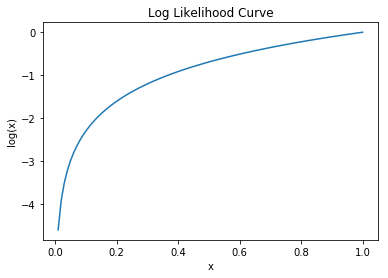

In [14]:
x = np.arange(0.01, 1+0.01, 0.01)
y = np.log(x)
plt.plot(x, y)
plt.title("Log Likelihood Curve")
plt.xlabel('x')
plt.ylabel('log(x)')

Also, see this [Math StackExchange Discussion](https://math.stackexchange.com/questions/892832/why-we-consider-log-likelihood-instead-of-likelihood-in-gaussian-distribution). To summarize:
1. It is extremely useful for example when you want to calculate the joint likelihood for a set of independent and identically distributed points.
2. Also in the case of Gaussian, it allows you to avoid computation of the exponential.

3. $\ln x$ is a monotonically increasing function, thus log-likelihoods have the same relations of order as the likelihoods:

$$ p(x | \Theta_1) > p(x | \Theta_2) \Leftrightarrow \ln p(x | \Theta_1) > \ln p(x | \Theta_2)$$
4. From a standpoint of computational complexity, you can imagine that first of all summing is less expensive than multiplication (although nowadays these are almost equal). But what is even more important, likelihoods would become very small and you will run out of your floating point precision very quickly, yielding an underflow. That's why it is way more convenient to use the logarithm of the likelihood. Simply try to calculate the likelihood by hand, using pocket calculator - almost impossible.

5. Additionally in the classification framework you can simplify calculations even further. The relations of order will remain valid if you drop the division by $2$ and the $2\ln(2\pi)$ term. You can do that because these are class independent. Also, as one might notice if variance of both classes is the same $\left(\sum_1=\sum_2\right)$, then you can also remove the $\ln\left(\det\sum\right)$ term.

---

## Negative Log-Likelihood (NLL) <a id='NLL'></a>
[To ToC](#concepts_toc)

The negative of the [log-likelihood](#log_likelihood) is used in machine learning simply because optimizers are setup to **minimize** the return value of a function. Taking the negative of the log-likelihood results in $-\infty$ and 0 for input values of $0$ and $1$, respectively. Optimizing the negative log-likelihood finds the maximum likelihood estimates (MLEs).

Text(0, 0.5, '-log(x)')

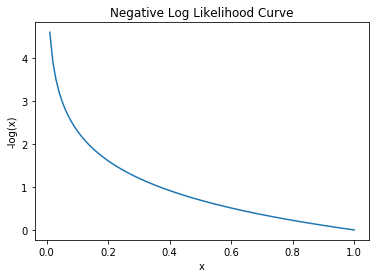

In [15]:
plt.plot(x, -y)
plt.title("Negative Log Likelihood Curve")
plt.xlabel('x')
plt.ylabel('-log(x)')

See this [discussion](https://stats.stackexchange.com/questions/141087/i-am-wondering-why-we-use-negative-log-likelihood-sometimes) and this [blog post](https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/) for more information.

---

## Restricted Boltzmann Machines (RBMs) <a class="anchor" id="rbm_concepts"></a> 
[To ToC](#concepts_toc)
- http://deeplearning.net/tutorial/rbm.html

#### Energy-Based Models (EBM)
> EBMs associate a scalar energy to each configuration of the variables of interest. Learning corresponds to modifying that energy function so that its shape has desirable properties. For example, we would like plausible or desirable configurations to have low energy. 

Energy-based probabilistic models define a probability distribution through an energy function:

\begin{equation} \tag{1}
p(x) = \frac{e^{-E(x)}}{Z}
\end{equation}

where $x$ is the *state*, $E(x)$ is the *energy function*, and $Z$ is the *[partition function](#partition_function)* defined as:

$$ Z = \sum_x e^{-E(x)}$$

##### Learning
The EBM can be learned via stochastic gradient descent on the empirical *[negative log-likelihood](#NLL)*.

Let the loss be defined as:

$$ \ell(\theta, \mathcal{D}) = -\frac{1}{N} \sum_{x^{(i)} \in \mathcal{D}} \log p\left(x^{(i)}\right)$$

then the gradient is $-\frac{\partial \log p(x^{(i)})}{\partial \theta}$, where $\theta$ are the parameters of the model.

#### Hidden Units
When the state $x$ is not fully observed or we wish to increase the expressive power of the model, so $x$ is delineated into **visible**, still denoted $x$, and **hidden**, $h$ states. Then we can rewrite $P(x)$ as 

\begin{equation} \tag{2}
P(x) = \sum_h P(x, h) = \sum_h \frac{e^{-E(x,h)}}{Z}
\end{equation}

In order to formualate Equation 2 similar to Equation 1, we introduce **free energy**, $\mathcal{F}$, defined as

\begin{equation} \tag{3}
\mathcal{F}(x) = -\log \sum_h e^{-E(x,h)}
\end{equation}

Solving Equation (3) for $\sum_h e^{-E(x,h)}$,
\begin{align*} 
\mathcal{F}(x) &= -\log \sum_h e^{-E(x,h)}\\
\log \sum_h e^{-E(x,h)} &= -\mathcal{F}(x)\\
\sum_h e^{-E(x,h)} &= e^{-\mathcal{F}(x)} \tag{$\dagger$}
\end{align*}

Beginning with Equation (2),
\begin{align*} 
P(x) &= \sum_h \frac{e^{-E(x,h)}}{Z}\\
&= \frac{1}{Z} \sum_h e^{-E(x,h)}, \qquad \text{ substitute in result } \dagger  \\
P(x) &= \frac{e^{-\mathcal{F}(x)}}{Z} \qquad \text{ where } Z = \sum_x e^{-\mathcal{F}(x)} \tag{4} \\
\end{align*}

##### Gradient
The resulting gradient for the negative log-likelihood has the form:

$$ -\frac{\partial \log p(x)}{\partial \theta} = \frac{\partial \mathcal{F}(x)}{\partial \theta} - \sum_{\tilde{x}} \frac{\partial \mathcal{F}(\tilde{x})}{\partial \theta}$$

**Positive Phase**, $\frac{\partial \mathcal{F}(x)}{\partial \theta}$ <br>
The first term on the right-hand-side, $\frac{\partial \mathcal{F}(x)}{\partial \theta}$, is referred to as the *positive phase*. This term is called 'positive' because it has a positive effect on the probability density defined by the model - that is, this term increases the probability of training data by reducing the corresponding free energy.

**Negative Phase**, $\sum_{\tilde{x}} \frac{\partial \mathcal{F}(\tilde{x})}{\partial \theta}$ <br>
The second term on the right-hand-side, $\sum_{\tilde{x}} \frac{\partial \mathcal{F}(\tilde{x})}{\partial \theta}$, is referred to as the *negative phase*. Similar to above, the negative phase term has a negative effect on the probability density defined by the model - that is, it decreases the probability of samples generated by the model.

##### Training
It is difficult to determine this gradient analyitically because it involves the computation of $E_P \left[\frac{\partial \mathcal{F}(x)}{\partial \theta} \right]$ -- the expectation over all possible configurations of the input $x$ under the distribution $P$ formed by the model.

To address this issue, the first step is to estimate this expectation using a fixed number of model samples. Samples used to estimate the *negative phase* gradient are referred to as **negative particles**, which are denoted as $\mathcal{N}$. We can reformulate the gradient as:

\begin{equation} \tag{5}
-\frac{\partial \log p(x)}{\partial \theta} \approx \frac{\partial \mathcal{F}(x)}{\partial \theta} - \frac{1}{|\mathcal{N}|} \sum_{\tilde{x} \in \mathcal{N}} \frac{\partial \mathcal{F}(\tilde{x})}{\partial \theta}
\label{eq:free_enery_gradient}
\end{equation}

where, ideally, the elements $\tilde{x}$ of $\mathcal{N}$ would be sampled according to $P$ (i.e., we are doing [Monte-Carlo](#monte_carlo)). 

With Equation \ref{eq:free_enery_gradient}, we nearly have a practical, stochastic algorithm for learning an EBM. The only missing piece is how to extract the negative particles, $\mathcal{N}$. I.e., we need a sampling method. In particular, we will use [Markov Chain Monte Carlo](#mcmc) methods.

##### RBMs
Boltzmann Machines (BMs) are a particular form of log-linear [Markov Random Field](#markov_random_field) (MRF) -- the energy function is linear in its free parameters. By adding hidden variables, the modeling capacity of the Boltzmann Machine is increased; i.e., the model is changed from a limited parameteric setting to a non-parametric one. RBMs further restrict the BM by disallowing self-connections within a layer: no visible-to-visible nor hidden-to-hidden connections. This results in a bipartite graph.

##### Energy Function
The energy function $E(v, h)$ of an RBM is defined as:

\begin{equation} \tag{6}
E(v,h) = -b^\prime v - c^\prime h - h^\prime W v
\end{equation}

where $W$ represents the weights connection hidden and visible units, and $b, c$ are the offsets of the visible and hidden layers, respectively.

The **free energy formula** is now:

$$ \mathcal{F}(v) = -b^\prime v - \sum_i \log \sum_{h_i}e^{h_i (c_i W_iv}$$

##### Conditional Independence Between Layers

Due to the bipartite graph structure of an RBM, the visible and hidden units are **conditionally independent** given one-another. Consequently:

\begin{align}
p(h|v) &= \prod_i p(h_i | v) \\
p(v|h) &= \prod_j p(v_j | h)
\end{align}

Typically, RBMs have binary units: $v_j, h_i \in \{0, 1\}$. Consequently, we obtain:

\begin{align}
P(h_i = 1 | v) &= \text{sigm} (c_i | W_iv) \tag{7} \\
P(v_j = 1 | h) &= \text{sigm} (b_j | W^\prime_jh) \tag{8}
\end{align}

and the *free energy* of a binary RBM simplifies to:

\begin{equation} \tag{9}
\mathcal{F}(v) = -b^\prime v - \sum_i \log (1 + e^{c_i + W_iv})
\end{equation}

In [16]:
IFrame("http://deeplearning.net/tutorial/rbm.html#view=FitH", width=PDF_W, height=PDF_H)

---

## Markov Chains <a class="anchor" id="markov_chains"></a> 
[To ToC](#concepts_toc)

**Resources**:
- [Markov Chain Wiki](https://en.wikipedia.org/wiki/Markov_chain)
- [Markov Chains an Monte Carlor Methods - An Introduction](https://github.com/christianb93/MachineLearning/blob/master/doc/MarkovChains/MarkovChainsIntroduction.pdf)

In [17]:
IFrame("https://en.wikipedia.org/wiki/Markov_chain", width=PDF_W, height=PDF_H)

**Definition**
> A discrete-time Markov chain is a sequence of random variables $X_1, X_2, X_3, \ldots$ with the [Markov property](https://en.wikipedia.org/wiki/Markov_property); namely, that the probability of moving to the next state depends only on the present state and not on the previous states. <br><br>
**Markov Property Def**:
$$ P(X_{n+1} = x | X_1 = x_1, X_2 = x_2, \ldots, X_n = x_n) \quad = \quad P(X_{n+1} = x | X_n = x_n) $$ <br>
if both conditional probabilities are well defined. <br><br>
This states, simply, that the conditional probability of the next state, $X_{n+1}$, is only dependent upon the current state, $X_n$. I.e., all information needed to make predictions about the future state is contained within the current state. <br><br>
The possible values of $X_i$ form a countable set $S$ called the **state space** of the chain.<br><br>
Markov chains are often described by a sequence of directed graphs, where the edges of graph $n$ are labeled by the probabilities of going from one state at time $n$ to the other states at time $n + 1$, $P(X_{n+1}=x \mid X_{n}=x_{n})$. <br>
E.g.,
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Finance_Markov_chain_example_state_space.svg/800px-Finance_Markov_chain_example_state_space.svg.png" width="500">

---

## Monte Carlo <a class="anchor" id="monte_carlo"></a> 
[To ToC](#concepts_toc)
- [Monte Carlo Method Wiki](https://en.wikipedia.org/wiki/Monte_Carlo_method)

In [18]:
IFrame("https://en.wikipedia.org/wiki/Monte_Carlo_method", width=PDF_W, height=PDF_H)

Monte Carlo typically refers to an algorithm that uses sampling to either simulate outcomes of a random experiment or to approximate integrals. Suppose we are given a finite measure $\pi$ on some state space, say $\mathbb{R}^n$, and we want to compute 

$$\int f d\pi$$

After normalization, we can assume that $\pi$ is a probability measure. Then the integral is the expectation value of the random variable $f$. If we had a method to create an independent and identically distributed series $X_n$ of samples from $\pi$, then the law of large numbers would tell us that for large $n$, 

$$\frac{1}{n} \sum_{k=1}^n f(X_n) \approx \int f d\pi$$

so that we obtain a good approximation to the integral by generating a sample, calculating the values $f(X_n)$ at the sampled points, and taking their average value. 

For example, recall that the expectation is an integral.
$$E[X] = \sum_{i=1}^\infty x_i p_i$$ where x_i is the value of a random variable and $p_i$ is the probability of corresponding to that value, $x_i$.

Monte Carlo provides a means for approximating this discrete integral, and therefore, MC is extremely useful in probability contexts - in particular, for approximating the [partition function](#partition_function).

#### Example: Approximate $\pi$

We can approximate $\pi$ via Monte Carlo. We construct the problem as follows:

Inscribe a circle within a square with side, $s = 1$. Then, necessarily the circle radius, r = $0.5$ and the center of the circle, $c_k = (0.5, 0.5)$.
 
The area of a circle is $A_{\text{circle}} = \pi r^2 = \frac{\pi}{4}$. The area of the square is $A_{\text{square}} = 1$.

Taking the ratio of the two areas,

\begin{equation} \tag{$\dagger$}
\frac{A_{\text{circle}}}{A_{\text{square}}} = \frac{\pi / 4}{1} = \frac{\pi}{4}
\end{equation}

Next, we uniformly sample a set of points $A = \{(x, y) : x, y \sim \mathrm{U}(0,1)\}$, where $|A| = N$, the number of sample points. 

We can calculate the number of points that are contained within the circle, $x_\text{circle}$. 

E.g., let $d_{x_i}$ denote the distance of the point $x_i$ from the center of the circle, $c_k$.  

$$d_{x_i} = \sqrt{(x-c_k)^2 + (y-c_k)^2} $$ 

Then, $x_\text{circle} = \{x_i : d_{x_i} < r \}$

We can now approximate the ratio from Equation $\dagger$ as:

$$\frac{x_\text{circle}}{N} \approx \frac{A_{\text{circle}}}{A_{\text{square}}} = \frac{\pi}{4}$$

Solve for $\pi$:

$$ \pi \approx \frac{4x_\text{circle}}{N}$$

Finally, denote the approximation of $\pi$ as $\hat{\pi}$:

$$ \hat{\pi} = \frac{4x_\text{circle}}{N}$$

By the [law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers), as $N \rightarrow \infty$, then $E\left[\hat{\pi}\right] \rightarrow \pi$, where $E[\cdot]$ is the expectation.

In [397]:
from IPython.display import HTML

In [ ]:
HTML()

In [394]:
import matplotlib.animation
from IPython.display import HTML
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Resources
# ---------
# https://stackoverflow.com/questions/9401658/how-to-animate-a-scatter-plot
# https://stackoverflow.com/questions/43445103/inline-animations-in-jupyter
# https://stackoverflow.com/questions/32847600/animation-in-matplotlib-with-scatter-and-using-set-offsets-how-to-update-color
# https://stackoverflow.com/questions/18195758/set-matplotlib-colorbar-size-to-match-graph

class MonteCarloApproximator(object):
    def __init__(self, N_start=10, N_stop=10000, N_step=5):
        self.points = np.arange(N_start, N_stop+N_step, N_step)
        self.num_points = len(self.points)
        self.radius = 0.5
        self.ck = 0.5
        
        self.display_interval = 1
        
        # Generate data
        self.__generate_data()
        
        # Initialize figure
        self.__init_figure()
            
    def __calc_distance(self, pt):
        d = np.sqrt((pt[0] - self.ck)**2 + (pt[1] - self.ck)**2)
        return d
    
    def __generate_data(self):
        self.data = []
        print("Generating data...")
        for i, n in enumerate(self.points):
            sys.stdout.write(f"\r\tData point {i+1}/{self.num_points} generated...")
            sys.stdout.flush()
            
            # Uniformly sample random points (x, y) in [-radius, radius]
            random_points = np.array([(np.random.uniform(0, 1), 
                                       np.random.uniform(0, 1)) for _ in range(n)])

            # Check if points in circle
            in_circle = np.array([self.__calc_distance(pt) < self.radius for pt in random_points]).astype(np.int)
            
            # Approximate pi
            pi_approx = 4 * (in_circle.sum() / float(n))
            
            data_i = [random_points, in_circle, pi_approx]
            self.data.append(data_i)
        print("\nComplete.")
    
    def __init_figure(self):
        # Setup the figure and axes...
        self.fig, self.ax = plt.subplots(figsize=(5,5))
        self.ax.axis([0, 1, 0, 1])
        self.ax.set_xticks([], [])
        self.ax.set_yticks([], [])
        self.scatter = self.ax.scatter([], [])
        
        # set_array necessary before calling colorbar
        self.scatter.set_array(np.array([0., 1.]))
        
        # Fixes aspect ratio issue when colorbar introduced
        divider = make_axes_locatable(self.ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = self.fig.colorbar(self.scatter, cax=cax)
        cbar.remove()
        
        # Setup pi approx text
        font = {'family': 'serif',
            'color':  'black',
            'weight': 'normal',
            'size': 28,
            "ha" : "center",
            "va" : "center"
        }
        self.pi_approx_text = self.ax.text(0.5, 0.5, '', transform=self.ax.transAxes, fontdict=font)
        
        # Prevents empty plot from showing
        plt.close()
        
    def update_plot(self, i):
        """Update the scatter plot."""
        values, coloring, pi = self.display_data[i]
        
        # Set x and y data...
        self.scatter.set_offsets(values[:,:2])
        
        # Set colors..
        self.scatter.set_array(coloring)
        
        # Pi average
        pi_average = np.mean(np.array(self.data)[:i+1,2])
        
        # Set text
        self.pi_approx_text.set_text(r"$\pi \approx$ {:0.6f}".format(pi_average))
        
        # Set title
        self.ax.set_title(f"N samples: {self.points[i]}")
        
        return self.scatter, self.pi_approx_text

    def __init_animation(self, anim_interval, num_display_points):
        # Then setup FuncAnimation.
        self.ani = matplotlib.animation.FuncAnimation(self.fig, self.update_plot, 
                                                      interval=anim_interval,
                                                      frames=num_display_points,
                                                      blit=True)
        
    def show(self, anim_interval=200, interval=None):
        print("Creating animation object...")
        if interval is not None:
            self.display_interval = interval
        
        # Subset the display data
        self.display_data = self.data[::self.display_interval]
        num_display_points = len(self.display_data)
        
        # Create animation
        self.__init_animation(anim_interval, num_display_points)
        
        # display inline   
        display(HTML(MC_pi_approx.ani.to_jshtml()))
        
        # Cleanup odd .png file being created
        png_files = glob.glob("None*.png")
        if png_files != []:
            for png_file in png_files:
                os.remove(png_file)

In [395]:
MC_pi_approx = MonteCarloApproximator(N_stop=100, N_step=10)

Generating data...
	Data point 10/10 generated...
Complete.


In [396]:
MC_pi_approx.show(anim_interval=100, interval=10)

Creating animation object...


---

## Markov Chain Monte Carlo (MCMC) <a class="anchor" id="mcmc"></a> 
[To ToC](#concepts_toc)
- [Markov Chain Monte Carlo Method Wiki](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo)
- [Markov Chains an Monte Carlo Methods - An Introduction](https://github.com/christianb93/MachineLearning/blob/master/doc/MarkovChains/MarkovChainsIntroduction.pdf)
- [Blog: Metropolis and Gibbs Sampling](http://people.duke.edu/~ccc14/sta-663-2016/16A_MCMC.html)

In [22]:
IFrame("https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo", width=PDF_W, height=PDF_H)

In [23]:
IFrame("http://people.duke.edu/~ccc14/sta-663-2016/16A_MCMC.html", width=PDF_W, height=PDF_H)

### Metropolis-Hastings <a class="anchor" id="metropolis_hastings"></a> 
- [Blog: Metropolis-Hastings](https://wiseodd.github.io/techblog/2015/10/17/metropolis-hastings/)
- [Wiki](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm)

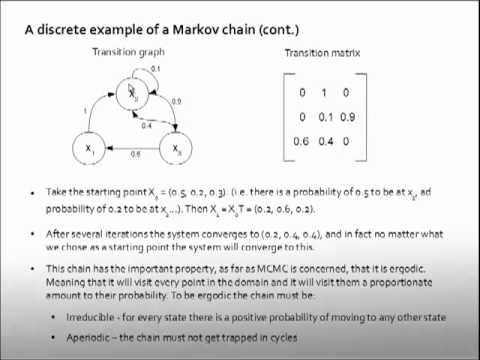

In [136]:
mcmc_vid = YouTubeVideo("h1NOS_wxgGg", width=PDF_W, height=PDF_H)
display(mcmc_vid)

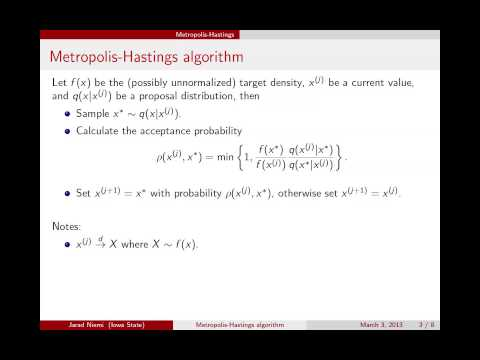

In [135]:
metropolis_hastings_vid = YouTubeVideo("VGRVRjr0vyw", width=PDF_W, height=PDF_H)
display(metropolis_hastings_vid)

In [26]:
IFrame("https://wiseodd.github.io/techblog/2015/10/17/metropolis-hastings/", width=PDF_W, height=PDF_H)

**Metropolis-Hastings** is an *MCMC sampling algorithm* used for sampling from high-dimensional, diffuclt (due to intractable integrals) to sample from distributions or functions.

- *Markov Chain* is satisfied because you only need to consider the current sample to obtain the next sample.
- *Monte Carlo* is satisifed because it generates random samples that can be used to compute integrals or numerical results; for example, in the probability distribution setting, the integrals we may want to compute are the expected value, mode, median, etc.

**Algorithm Components**
\begin{align}
x \qquad &: \quad \text{current state/sample} \\
x^\prime \qquad &: \quad \text{next state/sample} \\
P(x) \qquad &: \quad \text{target distribution; namely, the distribution we want to sample from} \\
Q(x | x^\prime) \qquad &: \quad \text{Transition distribution; suggests the next candidate of the Markov Chain} \\
\alpha \qquad &: \quad \text{acceptance probability} \\
\end{align}

The *acceptance probability* is defined as:

\begin{equation} \tag{$\dagger$}
\alpha = \min \left(1, \quad \frac{P(x^\prime)}{P(x)} \cdot \frac{Q(x^\prime | x)}{Q(x | x^\prime)}\right)
\end{equation}

**Special Case: Metropolis Algorithm**

When $Q$ is symmetric
$$ Q(x | x^\prime) \equiv Q(x^\prime | x)$$

then the ratio $\frac{Q(x^\prime | x)}{Q(x | x^\prime)} = 1$, and Equation $\dagger$ becomes

\begin{equation} \tag{$\ddagger$}
\alpha = \min \left(1, \quad \frac{P(x^\prime)}{P(x)}\right)
\end{equation}

This is a special case of the Metropolis-Hastings algorithm, refered to as the Metropolos algorithm.

**Algorithm**
>1. Initialize $x^{(0)}$.
2. For $i=0$ to $N - 1$
 + Sample $u \sim \mathit{U}[0, 1]$
 + Sample $x^* \sim q(x^* | x^{(i)}$
 + If $u < \mathrm{A}(x^{(i)}, x^*) = \min \left\{ 1, \quad \frac{p(x^*)}{p(x^{(i)})} \cdot \frac{q(x^{(i)}|q^*)}{q(x^* | q(x^{(i)})} \right\}$
    - $x^{(i + 1)} = x^*$
 + else
    - $x^{(i + 1)} = x^{(i)}$
 

Import notes from [blog](http://people.duke.edu/~ccc14/sta-663-2016/16A_MCMC.html):
> After some number of iterations $k$, the samples $\theta_{k+1}, \theta_{k+2}, \ldots $ will be samples from the posterior distributions. Here are initial concepts to help your intuition about why this is so:
- We accept a proposed move to $\theta_{k+1}$ whenever the density of the (unnormalized) target distribution at θk+1 is larger than the value of $\theta_k$ - so $\theta$ will more often be found in places where the target distribution is denser
- If this was all we accepted, $\theta$ would get stuck at a local mode of the target distribution, so we also accept occasional moves to lower density regions - it turns out that the correct probability of doing so is given by the ratio $\rho$
- **The acceptance criteria only looks at ratios of the target distribution, so the denominator cancels out and does not matter - that is why we only need samples from a distribution proportional to the posterior distribution**
- So, $\theta$ will be expected to bounce around in such a way that its spends its time in places proportional to the density of the posterior distribution - that is, $\theta$ is a draw from the posterior distribution.

#### Code Example

In [27]:
import numpy as np
import scipy.stats as stats
import seaborn as sns

##### Distributions

In [28]:
def circle_distribution(x):
    return (x[0]-1)**2 + (x[1]-2)**2 - 3**2

def gauss_distribution(x):
    return stats.norm.pdf(x)

def multi_gauss_distribution(x):
    mu_values = np.array([5, 5])
    cov_matrix = np.array([
        [1, .9], 
        [.9, 1]]
    )
    
    return stats.multivariate_normal.pdf([x], mean=mu_values, cov=cov_matrix)

def proposal_distribution(x):
    return x + np.random.normal(loc=0.0, scale=0.5, size=x.shape[0])

In [29]:
def metropolis_hastings(p, x_init, n_iterations=1000, n_burn=5):
    x = x_init
    samples = np.zeros((n_iterations, x.shape[0]))

    for i in range(n_iterations):
        x_star = proposal_distribution(x)
        alpha = np.min([1, p(x_star) / p(x)])
        if np.random.rand() < alpha:
            x = x_star
        samples[i] = x
    
    samples = np.array(samples[n_burn:])
        
    return samples

#### 1D

In [30]:
x_init = np.array([0.5])
N_samples = 5000
samples_1d = metropolis_hastings(gauss_distribution, x_init, n_iterations=N_samples)

In [31]:
x_gauss = np.arange(samples_1d.min(), samples_1d.max(), 0.01)
y_gauss = stats.norm.pdf(x_gauss)

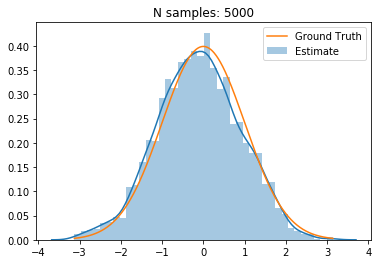

In [356]:
sns.distplot(samples_1d, label='Estimate')
plt.plot(x_gauss, y_gauss, label='Ground Truth')
plt.title(f"N samples: {N_samples}")
plt.legend()

##### 2D

In [357]:
x_init = np.array([0., 0.])
sample_points = [100, 10000]

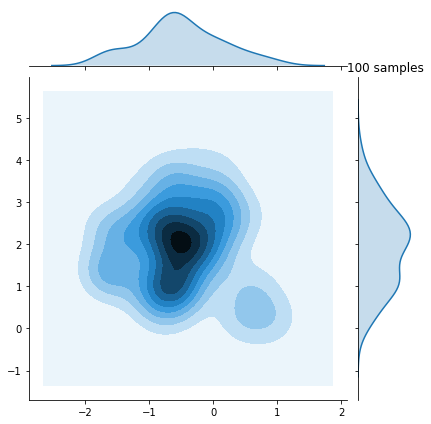

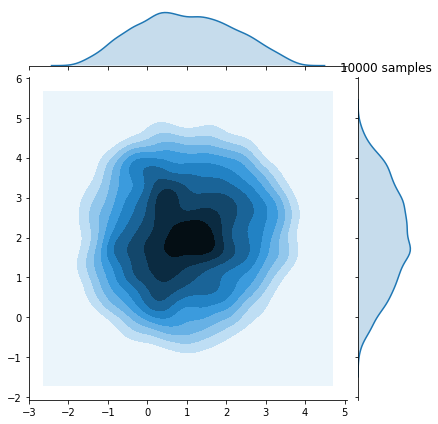

In [358]:
for i in sample_points:
    samples = metropolis_hastings(circle_distribution, x_init, n_iterations=i)
    sns.jointplot(samples[:, 0], samples[:, 1], kind="kde")
    plt.title(f"{i} samples")

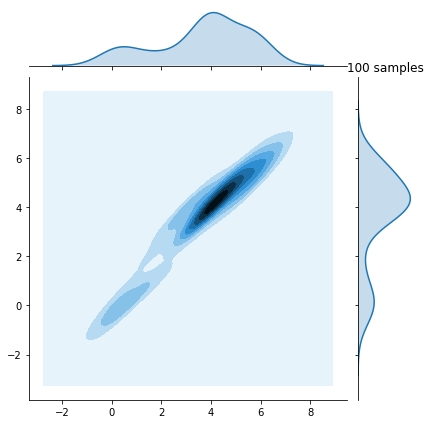

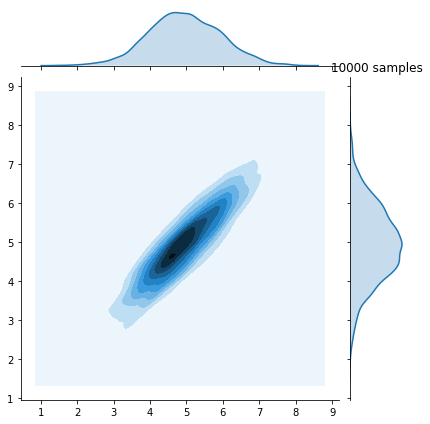

In [359]:
for i in sample_points:
    samples = metropolis_hastings(multi_gauss_distribution, x_init, n_iterations=i)
    sns.jointplot(samples[:, 0], samples[:, 1], kind="kde")
    plt.title(f"{i} samples")

### Gibbs Sampling <a class="anchor" id="gibbs_sampling"></a> 
- [Gibbs Sampling Wiki](https://en.wikipedia.org/wiki/Gibbs_sampling)
- [Blog: Metropolis and Gibbs Sampling](http://people.duke.edu/~ccc14/sta-663-2016/16A_MCMC.html)

In [ ]:
IFrame("https://en.wikipedia.org/wiki/Gibbs_sampling", width=PDF_W, height=PDF_H)

---

## Markov Random Fields (MRF) <a class="anchor" id="markov_random_field"></a> 
[To ToC](#concepts_toc)
- [Markov Random Field Wiki](https://en.wikipedia.org/wiki/Markov_random_field)

In [ ]:
IFrame("https://en.wikipedia.org/wiki/Markov_random_field", width=PDF_W, height=PDF_H)

---

## Contrastive Divergence <a class="anchor" id="contrastive_divergence"></a> 
[To ToC](#concepts_toc)
- [Notes on Contrastive Divergence](http://www.robots.ox.ac.uk/~ojw/files/NotesOnCD.pdf)
- [Blog: Understanding Contrastive Divergence](https://datascience.stackexchange.com/questions/30186/understanding-contrastive-divergence)

In [ ]:
IFrame("http://www.robots.ox.ac.uk/~ojw/files/NotesOnCD.pdf#view=FitH", width=PDF_W, height=PDF_H)

>Gibbs sampling is an example for the more general **Markov chain Monte Carlo** methods to sample from distribution in a high-dimensional space.

>To explain this, I will first have to introduce the term **state space**. Recall that a Boltzmann machine is built out of binary units, i.e. every unit can be in one of two states - say 0 and 1. The overall state of the network is then specified by the state for every unit, i.e. the states of the network can be described as points in the space $\{0,1\}^N$, where $N$ is the number of units in the network. This point is called the **state space**.

>Now, on that state space, we can define a **probability distribution**. The details are not so important, but what you essentially do is that you define energy for every state and turn that into a probability distribution using a **Boltzmann distribution**. Thus there will be states that are likely and other states that are less likely.

>A Gibbs sampler is now a procedure to produce a sample, i.e. a sequence $X_n$ of states such that, roughly speaking, the distribution of these states across the state space reflects the probability distribution. Thus you want most of the $X_n$ to be in regions of the state space with high probability (and low energy), and few of them to be in regions with low probability (and high energy).

>To do this, a naive Gibbs sampling approach would proceed as follows. You start with some state $X_0$. To find the state $X_1$, you would pick some unit and calculate the conditional probability for that unit to be in state 1 ("on") **conditional on the current value of all other units**. Call this number $p$. You would then set the unit to 1 with probability $p$ and pick the next unit to repeat this to get from $X_1$ to $X_2$ and so forth.

>In the special case of a restricted Boltzmann machine, this can be greatly simplified. Instead of going through, say, first all hidden units and then all visible units and update them like this one by one, you can, in fact, update all hidden units in one step and all visible units in one step, because any two hidden units and any two visible units are independent. Thus, for a full cycle through all units of the state space, you would:

>- calculate the probability for all hidden units to be 1, given the value of the visible units
- set the hidden units to 1 with this probability
- calculate the probability for the visible units to be 1, again conditional on the value of the hidden units, and
- set the visible units to 1 with this probability

>This constitutes one full Gibbs sampling step and is your step 1 + the first part of 3 (the second part is then needed for the further calculation and not part of the sampling). The reason why we do this in the CD algorithm is that we actually want to approximate an expectation value and use a sampler for this.

>This is a complex topic and hard to summarize in a few sentences. If you want to learn more about the mathematics behind this (Markov chains) and on the application to RBMs (contrastive divergence and persistent contrastive divergence), you might find [this](https://github.com/christianb93/MachineLearning/blob/master/doc/MarkovChains/MarkovChainsIntroduction.pdf) and [this](https://github.com/christianb93/MachineLearning/blob/master/doc/BoltzmannMachine/BoltzmannMachinesAndHopfieldNetworks.pdf) document helpful - these are some notes that I put together while learning about this.

- [Source](https://datascience.stackexchange.com/questions/30186/understanding-contrastive-divergence)

---

## Partition Function <a class="anchor" id="partition_function"></a> 
[To ToC](#concepts_toc)
- [Nice Blog on Partition Function](https://calculatedcontent.com/2013/11/14/foundations-the-parition-function/)

In [ ]:
IFrame("https://calculatedcontent.com/2013/11/14/foundations-the-parition-function/", width=PDF_W, height=PDF_H)

Consider the energy function for an RBM,

$$ E(h, v) = v^Ta + h^Tb + v^TWh $$

The *partition function* is given by

$$ Z(\beta) = \sum_i \exp(-\beta E_i) $$

where $\beta$ is the *temperature* of the system. In deep learning applications, $\beta = \frac{1}{T} = 1, \quad T \neq 0$.

The partition function can be thought of as the **normalization** of the Boltmann probability distribution.

The partition function is also a generating function for thermodynamic variables, such as
1. The **average internal energy** $(U)$ of the system:
 $$ U = < E > = \frac{\partial}{\partial \beta} Z(\beta)$$
2. The **Helmholtz Free Energy**, $A$:
 $$ A = U - TS = -\frac{1}{\beta}\log Z(\beta)$$
 
 where $S$ is the entropy.
 
**N.B.** If we minimize the free energy, the resulting probabilities follow the Boltzmann / Gibbs distribution:
> **Boltzmann / Gibbs distribution**: probability that a system will be in a certain state as a function of that state's energy and the temperature of the system. The distribution is expressed in the form:
$$ p_i \propto e^{-\frac{\epsilon_i}{kT}} $$ <br>
where p_i is the probability of the sytem being in state $i$, $\epsilon_i$ is the energy of that state, and a constant $kT$ of the distribution is the product of Boltzmann's constant $k$ and thermodynamic temperature T.

Free Energy methods, operating at (T>0), effectively sample all the low lying local minima simultaneously.

---

## Sigma-Algebra <a class="anchor" id="sigma_algebra"></a> 
[To ToC](#concepts_toc)
- [Sigma-algebra Wiki](https://en.wikipedia.org/wiki/Sigma-algebra)

In [ ]:
IFrame("https://en.wikipedia.org/wiki/Sigma-algebra", width=PDF_W, height=PDF_H)

**Definition**
> A **$\sigma$-algebra** on a set $X$ is a collection $\Sigma$ of subsets of $X$ that 
1. includes $X$ itself,
2. is [closed](https://en.wikipedia.org/wiki/Closure_(mathematics)) under [complement](https://en.wikipedia.org/wiki/Complement_(set_theory))  $\quad A^c = \{x \in U | x \notin A \}$, and
3. is closed under countable [unions](https://en.wikipedia.org/wiki/Union_(set_theory)) $\quad A \cup B = \{x : x \in A \text{ or } x \in B \} $ <br>
implying that
 + $\emptyset \in \Sigma$
 + closed under countable [intersections](https://en.wikipedia.org/wiki/Intersection_(set_theory)) $\quad A \cap B = \{x : x \in A \text{ and } x \in B \} $
 
E.g.,
If $ X = \{a, b, c, d\}$, one possible $\sigma$-algebra on $X$ is $\Sigma = \{ \emptyset, \{a, b\}, \{c, d\}, \{a, b, c, d\} \}$.

**T.D.**
In probability, σ-algebras are pivotal in the definition of [conditional expectation](https://en.wikipedia.org/wiki/Conditional_expectation):

$$ E(X | H) = \frac{\sum_{\omega \in H} X(\omega)}{|H|}$$

---

## Boltzmann Distribution <a class="anchor" id="boltzmann_distribution"></a> 
[To ToC](#concepts_toc)
- [Boltzmann Distribution Wiki](https://en.wikipedia.org/wiki/Boltzmann_distribution)

In [ ]:
IFrame("https://en.wikipedia.org/wiki/Boltzmann_distribution", width=PDF_W, height=PDF_H)

---

## Variational Inference <a class="anchor" id="variational_inference"></a> 
[To ToC](#concepts_toc)
- [Variational Bayesian Methods Wiki](https://en.wikipedia.org/wiki/Variational_Bayesian_methods)
- [Variational Inference: A Review for Statisticians](https://arxiv.org/abs/1601.00670)

In [ ]:
IFrame("https://arxiv.org/pdf/1601.00670.pdf", width=PDF_W, height=PDF_H)

---

---

---

---

# Sort Out

---

## Continuous Attractors of Discrete-Time Recurrent Neural Networks
- Yu, Jiali, et al. (2012)
- https://sci-hub.tw/10.1007/s00521-012-0975-5

### Key Points
- RNNs can possess more than one and even infinite stable equilibrium points.
 - These points may be isolated (discrete) or connected (continuous)
 - Continuous attractors have been used to describe the encoding of continuous stimuli such as eye position, head direction, moving direction, path integrator, cognitive map, and population decoding.
- In these networks, RNNs may have a finite number of neurons or infinite number of neurons.
 - These two categories of RNN differ in their dynamics, from a mathematical point of view.
 
- This paper focuses on continuous attractors with finite number of neurons. 

---

## Memory Dynamics in Attractor Networks
- Li, Quoqi, et al. (2015)
- https://pdfs.semanticscholar.org/840c/a6d4434de3dac8cf13dff6d4bcbbc2164922.pdf

### Key Points
- Propose a new energy function that is nonnegative and attains zero values only at the desired memory patterns.
- Following from the contrived energy function, an attractor network is derived. This approach avoids the existence of spurious points (local maxima, saddle points, or other local minima which are undesired memory patters).

---

## Bridging the Gaps Between Residual Learning, Recurrent Neural Networks and Visual Cortex (Liao, 2016)
- Liao, Q., Poggio, T. (2016)
- https://arxiv.org/pdf/1604.03640.pdf

---

---

---

# Useful Things

## Jupyter Notebook
1. [28 Jupyter Notebook tips, tricks, and shortcuts](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)
2. [Jupyter Config File](https://jupyter-notebook.readthedocs.io/en/latest/config.html)
3. [Version Control](https://www.svds.com/jupyter-notebook-best-practices-for-data-science/)
4. [Notebook Server](https://jupyter-notebook.readthedocs.io/en/latest/public_server.html)

## PyTorch
1. [Weight Initialization](https://discuss.pytorch.org/t/whats-the-default-initialization-methods-for-layers/3157/10)

## General Deep Learning
1. [DL Best Practices - Weight Initialization](https://medium.com/usf-msds/deep-learning-best-practices-1-weight-initialization-14e5c0295b94)

## Python
1. [Raymond Hettinger - Super considered super! - PyCon 2015](https://www.youtube.com/watch?v=EiOglTERPEo)